# **KLASIFIKASI DENGAN CONVOLUTIONAL NEURAL NETWORK (CNN)**

**Kelas 2023D  
Kelompok 9:**  
1. Ardina Shaifa Ramadhany (027)  
2. Sheira En Nadia (041)
3. Gisella Serafina L M (215)
4. Alya' Hikmatul Rizkia (229)

 **Split data folder bahan ke folder train dan test**


In [ ]:
# import os, shutil
# from sklearn.model_selection import train_test_split

# # direktori sumber
# bahan_dir = '/content/drive/My Drive/Sampah/Bahan'
# train_dir = '/content/drive/My Drive/Sampah/Train'
# test_dir = '/content/drive/My Drive/Sampah/Test'

# # daftar kelas
# kelas = ['Botol Plastik', 'Botol Kaca', 'Kardus', 'Kaleng', 'Plastik Snack']

# for k in kelas:
#     src = os.path.join(bahan_dir, k)
#     all_files = [f for f in os.listdir(src) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
#     train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)

#     os.makedirs(os.path.join(train_dir, k), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, k), exist_ok=True)

#     for f in train_files:
#         shutil.copy(os.path.join(src, f), os.path.join(train_dir, k, f))
#     for f in test_files:
#         shutil.copy(os.path.join(src, f), os.path.join(test_dir, k, f))

# print("Selesai copy gambar ke Train & Test.")


Selesai copy gambar ke Train & Test.


## **Tanpa Tuning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/Sampah/Train'

img_size = (224, 224)
batch_size = 16

# Load awal dataset
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='int'
)

raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='int'
)

class_names = raw_train_ds.class_names
num_classes = len(class_names)

# preprocessing
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.densenet.preprocess_input

train_ds = raw_train_ds.map(lambda x, y: (preprocess(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = raw_val_ds.map(lambda x, y: (preprocess(x), y)).cache().prefetch(AUTOTUNE)


Mounted at /content/drive
Found 400 files belonging to 5 classes.
Using 320 files for training.
Found 400 files belonging to 5 classes.
Using 80 files for validation.


In [ ]:
base_model = tf.keras.applications.DenseNet201(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
])

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True, monitor='val_loss'
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/My Drive/best_model_sampah.keras',
    save_best_only=True, monitor='val_loss'
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.1387 - loss: 2.0081 - val_accuracy: 0.1750 - val_loss: 1.7858
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.2154 - loss: 1.7047 - val_accuracy: 0.3250 - val_loss: 1.5698
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - accuracy: 0.3454 - loss: 1.5290 - val_accuracy: 0.4125 - val_loss: 1.4144
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - accuracy: 0.4605 - loss: 1.3622 - val_accuracy: 0.4625 - val_loss: 1.2747
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.5341 - loss: 1.2530 - val_accuracy: 0.5625 - val_loss: 1.1591
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.6312 - loss: 1.1020 - val_accuracy: 0.6375 - val_loss: 1.0562
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.6317 - loss: 1.0383 - val_accuracy: 0.6875 - val_loss: 0.9712
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.7160 - loss: 0.9076 - val_accuracy: 0.7

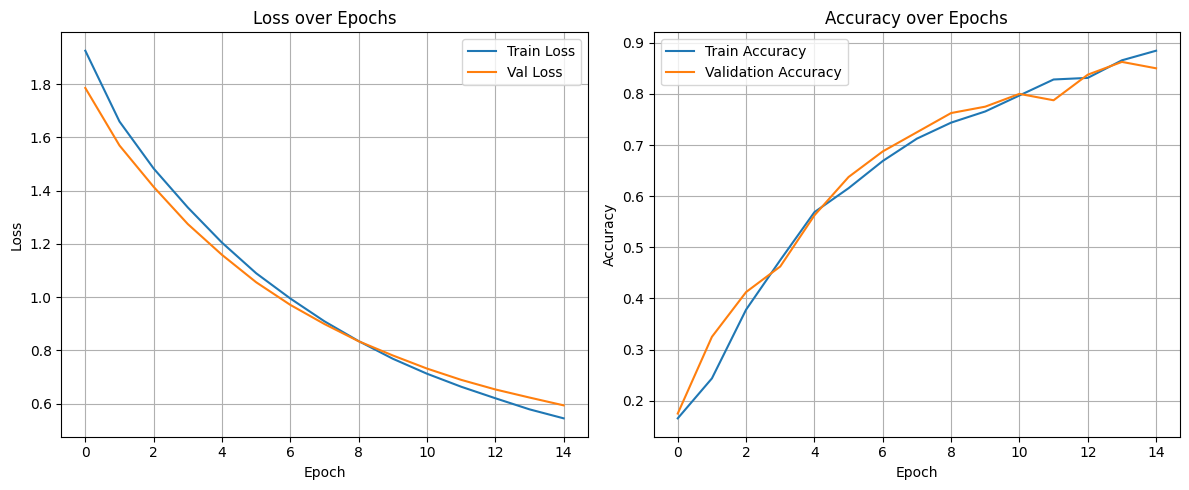

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Found 100 files belonging to 5 classes.

Akurasi Test: 81.00%

Classification Report:

               precision    recall  f1-score   support

   Botol Kaca       0.60      0.75      0.67        20
Botol Plastik       0.71      0.75      0.73        20
       Kaleng       0.93      0.65      0.76        20
       Kardus       0.95      1.00      0.98        20
Plastik Snack       0.95      0.90      0.92        20

     accuracy                           0.81       100
    macro avg       0.83      0.81      0.81       100
 weighted avg       0.83      0.81      0.81       100



<Figure size 800x600 with 0 Axes>

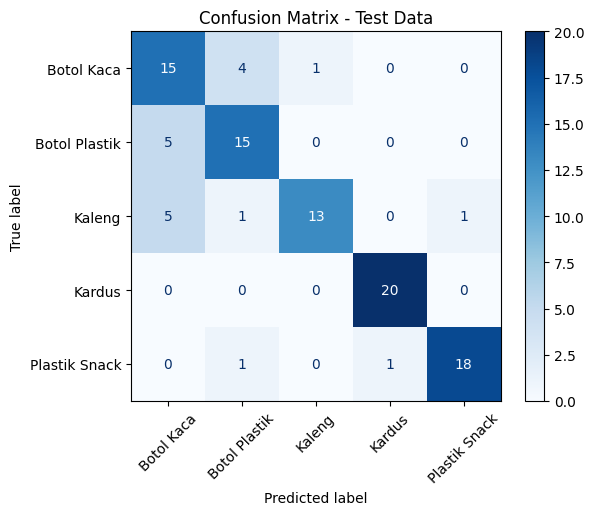

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load model terbaik
model = keras.models.load_model('/content/drive/My Drive/best_model_sampah.keras')

# Load test dataset
test_dir = '/content/drive/My Drive/Sampah/Test'
img_size = (224, 224)
batch_size = 16
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.densenet.preprocess_input

raw_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,
    label_mode='int'
)

test_ds = raw_test_ds.map(lambda x, y: (preprocess(x), y)).cache().prefetch(AUTOTUNE)

class_names = raw_test_ds.class_names

# Evaluasi prediksi pada test set
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model(images, training=False)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAkurasi Test: {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Data")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


# **Hyperparameter Tuning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/Sampah/Train'

img_size = (224, 224)
batch_size = 16

# Load awal dataset
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='int'
)

raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='int'
)

class_names = raw_train_ds.class_names
num_classes = len(class_names)

# preprocessing
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.densenet.preprocess_input

train_ds = raw_train_ds.map(lambda x, y: (preprocess(x), y)).cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = raw_val_ds.map(lambda x, y: (preprocess(x), y)).cache().prefetch(AUTOTUNE)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 400 files belonging to 5 classes.
Using 320 files for training.
Found 400 files belonging to 5 classes.
Using 80 files for validation.


In [ ]:
from tensorflow.keras import layers, models, regularizers

# Load base model DenseNet201
base_model = tf.keras.applications.DenseNet201(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
base_model.trainable = False  # freeze saat training awal

# Model dengan tuning
model = models.Sequential([
    base_model,

    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/best_model_sampah_tuning.keras',
                                           save_best_only=True)
    ]
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.3208 - loss: 2.7632 - val_accuracy: 0.5625 - val_loss: 1.8946
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 201ms/step - accuracy: 0.6444 - loss: 1.6106 - val_accuracy: 0.6750 - val_loss: 1.4442
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.7502 - loss: 1.2215 - val_accuracy: 0.8125 - val_loss: 1.0501
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8046 - loss: 1.0409 - val_accuracy: 0.8375 - val_loss: 0.9163
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.8647 - loss: 0.9321 - val_accuracy: 0.8625 - val_loss: 0.8665
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.9427 - loss: 0.7298 - val_accuracy: 0.8625 - val_loss: 0.8309
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9675 - loss: 0.6699 - val_accuracy: 0.9000 - val_loss: 0.7759
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9545 - loss: 0.6489 - val_accuracy: 0.9

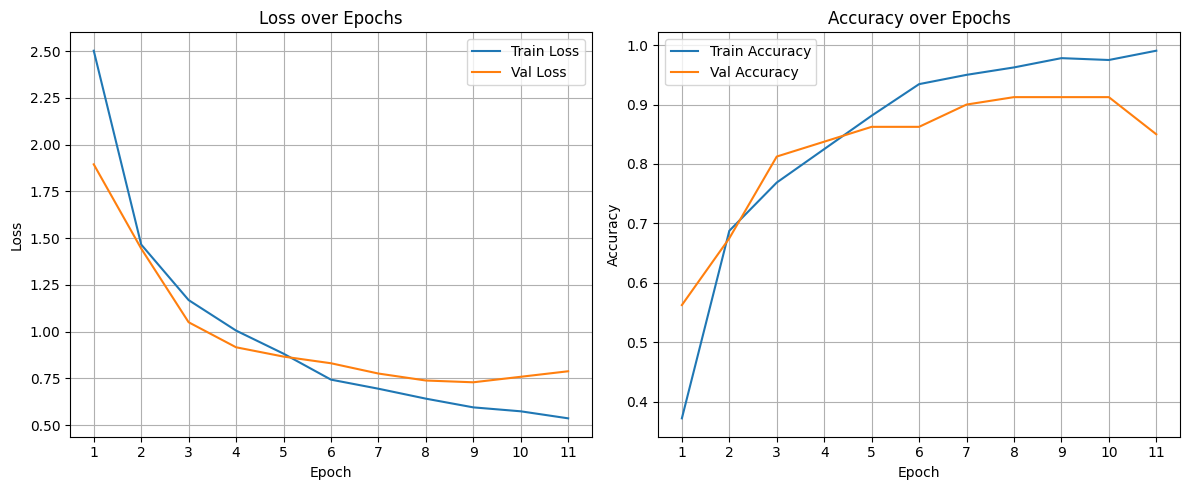

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Found 100 files belonging to 5 classes.

Akurasi Test: 93.00%

Classification Report:

               precision    recall  f1-score   support

   Botol Kaca       0.83      1.00      0.91        20
Botol Plastik       1.00      0.85      0.92        20
       Kaleng       0.95      0.95      0.95        20
       Kardus       0.95      1.00      0.98        20
Plastik Snack       0.94      0.85      0.89        20

     accuracy                           0.93       100
    macro avg       0.94      0.93      0.93       100
 weighted avg       0.94      0.93      0.93       100



<Figure size 800x600 with 0 Axes>

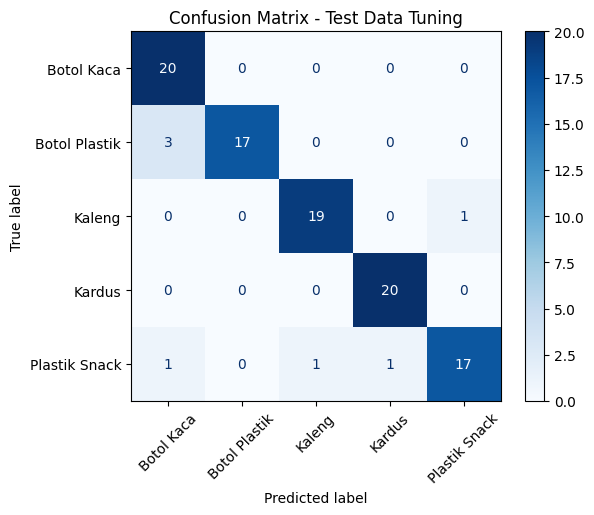

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load model terbaik
model = keras.models.load_model('/content/drive/My Drive/best_model_sampah_tuning.keras')

# Load test dataset
test_dir = '/content/drive/My Drive/Sampah/Test'
img_size = (224, 224)
batch_size = 16
AUTOTUNE = tf.data.AUTOTUNE
preprocess = tf.keras.applications.densenet.preprocess_input

raw_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False,              # Jangan di-shuffle untuk evaluasi
    label_mode='int'
)

test_ds = raw_test_ds.map(lambda x, y: (preprocess(x), y)).cache().prefetch(AUTOTUNE)

class_names = raw_test_ds.class_names

# Evaluasi prediksi pada test set
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model(images, training=False)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAkurasi Test: {accuracy * 100:.2f}%")

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:\n")
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Data Tuning")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()
